In [28]:
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [30]:
# store the feature matrix (X): input,  and response vector (y): output (pre labeled answers)
X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names
feature_names
target_names
type(y)

numpy.ndarray

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

In [31]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


test_size: is used to manipulate the size of test and train data

In [33]:
#KNN Classifier. Try changing the n_neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

C:\Users\panwa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1:Create KNN classifier ; 2:fit the classifier to the data
1:knn = KNeighborsClassifier(n_neighbors = 3); 2:knn.fit(X_train,y_train)

In [20]:
#Accuracy of our model based on our test output and prediction output
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [34]:
#using another model
from sklearn.tree import DecisionTreeClassifier
knn = DecisionTreeClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [22]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9


In [23]:
sample = [[3,5,4,2], [2,3,5,4]]
predictions = knn.predict(sample)
pred_species = [iris.target_names[p] for p in predictions]
print('predictions:' , pred_species)

predictions: ['versicolor', 'virginica']


Giving 2 new inputs and using .predict() to test new data

In [25]:
#Model persistance is important. Next time we want to make a prediction we save a model to a file and use that file for predictions.
from joblib import dump, load
dump(knn, 'knn_brain.joblib') 

['knn_brain.joblib']

In [27]:
#Load our model
model = load('knn_brain.joblib')
model.predict(X_test)
sample = [[3,5,4,2], [2,3,5,4]]
predictions = model.predict(sample)
pred_species = [iris.target_names[p] for p in predictions]
print('predictions:' , pred_species)

predictions: ['versicolor', 'virginica']


joblib: is used to save our model so that we dont have to train our model again which requires a lot of power; also it is faster in saving/loading NumPy arrays.

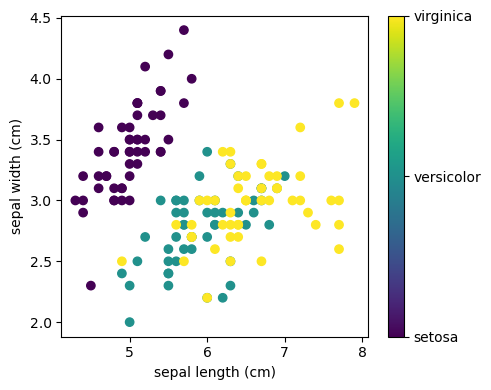

In [35]:
from sklearn.datasets import load_iris 
iris = load_iris() 
import matplotlib.pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# colorbar with the Iris target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

#chart configurations
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

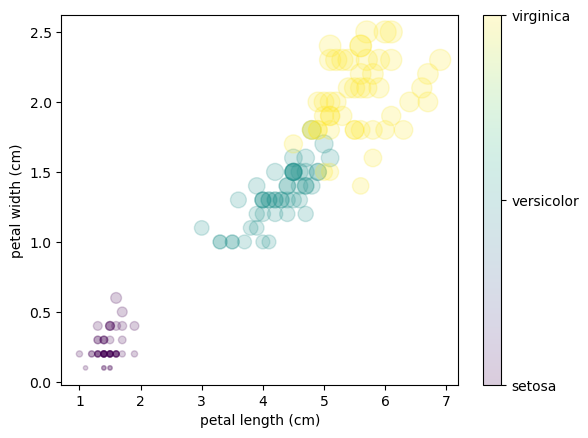

In [36]:
features = iris.data.T

plt.scatter(features[2], features[3], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis') #https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);
plt.colorbar(ticks=[0, 1, 2], format=formatter)